# Project: Investigate a Dataset - Soccer Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
Below is what to expect to find in this in the soccer dataset. I acquired this data from  [kaggle](https://www.kaggle.com/datasets/hugomathien/soccer).

Soccer dataset for data analysis:

- +25,000 matches
- +10,000 players 
- 11 European Countries with their lead championship
- Seasons 2008 to 2016
- Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates
- Team line up with squad formation (X, Y coordinates)
- Betting odds from up to 10 providers
- Detailed match events (goal types, possession, corner, cross, fouls, cards etc…) for +10,000 matcheAbout Dataset

This dataset is stored in a SQLite database.



### Questions for Analysis
>- **What is the age distribution of players?**
>- **What teams improved the most over time?**
>- **Which players had the most penalties?**
>- **What team attributes lead to the most victories?**
>- **What player attributes lead to the most victories?**
>- **How do the player attributes that lead to most victories change with time?**
>- **How does the potential of players over time?**


In [1]:
# I am importing all the packages I will need

import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

I am using sqlite3 package to connect to the sqlite soccer database

In [2]:
conn = sqlite3.connect('database.sqlite')

In [3]:
cur = conn.cursor()

I am looking to see what are the available tables and their names

In [4]:
table_names = cur.execute("SELECT name FROM sqlite_master WHERE type='table'").fetchall()
for i,table in enumerate(table_names):
    print(i,table[0])

0 sqlite_sequence
1 Player_Attributes
2 Player
3 Match
4 League
5 Country
6 Team
7 Team_Attributes


**In the following cells I read in the data from the sqlite database into pandas dataframes for easy exploration and analysis**

### Player Attributes

As a non soccer fan I find I am lost trying to understand the player attriibutes.

I set out to the internet to find clarity and I found discription of these attributes [here](https://www.guidetofm.com/players/attributes/)

In [5]:
ply_attr = pd.read_sql(f'SELECT * FROM player_attributes', conn)

In [6]:
ply_attr.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [7]:
ply_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [8]:
ply_attr.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


### Players

In [9]:
players = pd.read_sql(f'SELECT * FROM player', conn)

In [10]:
players.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [11]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


I am looking to see if there are duplicated rows and remove them

In [12]:
sum(players.duplicated())

0

I am converting the players dataframe datatypes to appropriate types

- `birthday` to `datatime`
- `weight` to `float`

In [13]:
players.birthday = pd.to_datetime(players.birthday)

In [14]:
players.weight = players.weight.astype(float)

In [15]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  11060 non-null  int64         
 1   player_api_id       11060 non-null  int64         
 2   player_name         11060 non-null  object        
 3   player_fifa_api_id  11060 non-null  int64         
 4   birthday            11060 non-null  datetime64[ns]
 5   height              11060 non-null  float64       
 6   weight              11060 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 605.0+ KB


In [16]:
players.describe()

,id,player_api_id,player_fifa_api_id,height,weight
count,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000
mean,5537.511392,156582.427215,165664.910488,181.867445,168.380289
std,3197.692647,160713.700624,58649.928360,6.369201,14.990217
min,1.000000,2625.000000,2.000000,157.480000,117.000000
25%,2767.750000,35555.500000,151889.500000,177.800000,159.000000
50%,5536.500000,96619.500000,184671.000000,182.880000,168.000000
75%,8306.250000,212470.500000,203883.250000,185.420000,179.000000
max,11075.000000,750584.000000,234141.000000,208.280000,243.000000


### Matches

In [17]:
matches = pd.read_sql(f"SELECT * FROM match", conn)

In [18]:
matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [19]:
matches['date'] = pd.to_datetime(matches['date'])

In [20]:
matches.columns.values

array(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_player_X1',
       'home_player_X2', 'home_player_X3', 'home_player_X4',
       'home_player_X5', 'home_player_X6', 'home_player_X7',
       'home_player_X8', 'home_player_X9', 'home_player_X10',
       'home_player_X11', 'away_player_X1', 'away_player_X2',
       'away_player_X3', 'away_player_X4', 'away_player_X5',
       'away_player_X6', 'away_player_X7', 'away_player_X8',
       'away_player_X9', 'away_player_X10', 'away_player_X11',
       'home_player_Y1', 'home_player_Y2', 'home_player_Y3',
       'home_player_Y4', 'home_player_Y5', 'home_player_Y6',
       'home_player_Y7', 'home_player_Y8', 'home_player_Y9',
       'home_player_Y10', 'home_player_Y11', 'away_player_Y1',
       'away_player_Y2', 'away_player_Y3', 'away_player_Y4',
       'away_player_Y5', 'away_player_Y6', 'away_player_Y7',
       'aw

I am looking to see the datatypes of the matches dataframe

In [21]:
matches.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 115 columns):
 #    Column            Dtype         
---   ------            -----         
 0    id                int64         
 1    country_id        int64         
 2    league_id         int64         
 3    season            object        
 4    stage             int64         
 5    date              datetime64[ns]
 6    match_api_id      int64         
 7    home_team_api_id  int64         
 8    away_team_api_id  int64         
 9    home_team_goal    int64         
 10   away_team_goal    int64         
 11   home_player_X1    float64       
 12   home_player_X2    float64       
 13   home_player_X3    float64       
 14   home_player_X4    float64       
 15   home_player_X5    float64       
 16   home_player_X6    float64       
 17   home_player_X7    float64       
 18   home_player_X8    float64       
 19   home_player_X9    float64       
 20   home_player_X10   float64 

In [22]:
sum(matches.duplicated())

0

below I will clean the matches data in these columns `goal, shoton, shotoff, foulcommit, card, cross, corner, possession`. The data is in the form of markdown format.

I will import the `BeautifulSoup` library so I can easily read the html structure

In [23]:
from bs4 import BeautifulSoup as bs

In [24]:
columns = ['match_api_id','goal', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner', 'possession']

The cell below selects only the rows that are not `null` or `None`

In [25]:
html_format_matches_data = matches[columns][np.invert(matches[columns].isnull().any(axis=1))]

The functions below extracts information from the xml in columns and creates a new data frame of that column.

The new data frame will have the match id and desired clean data

In [26]:
def clean_html(dataframe, column_name):
    dataframe_subset = dataframe[['match_api_id',f'{column_name}']]
    
    if column_name=='goal':
        find = 'goals'
        
    elif column_name=='shoton':
        find = 'shoton'
        
    elif column_name=='shotoff':
        find = 'shotoff'
        
    elif column_name=='foulcommit':
        find = 'foulscommitted'
        
    elif column_name=='cross':
        find = 'crosses'
        
    elif column_name=='corner':
        find = 'corners'
        
    else:
        find='ycards'
   
    
    clean_arr = []
    for match_id, dirty_column in dataframe_subset.values:
        bs_content = bs(dirty_column, 'html.parser')
        
        for xml in bs_content.find_all('value'):
            try:
                player_id = xml.find('player1').get_text()
                team_id = xml.find('team').get_text()
                data = xml.find(find).get_text()
            except Exception:
                continue
            clean_arr.append([match_id, player_id, team_id, data])
            
    return pd.DataFrame(
        np.array(clean_arr), 
        columns=['match_api_id',f'player_api_id_{column_name}',f'team_api_id_{column_name}',f'{column_name}']
    )

In [27]:
def get_possession(dataframe):
    
    dataframe_subset = dataframe[['match_api_id','possession']]

    clean_arr = []
    for match_id, dirty_column in dataframe_subset.values:
        bs_content = bs(dirty_column, 'html.parser')
        
        for xml in bs_content.find_all('value'):
            try:
                away_pos = xml.find('awaypos').get_text()
                home_pos = xml.find('homepos').get_text()
            except Exception:
                continue
            clean_arr.append([match_id, home_pos, away_pos])
            
    return pd.DataFrame(
        np.array(clean_arr), 
        columns=['match_api_id','home_possession','away_possession']
    )

The below cells are extracting the data from the xml format.
<br>
The `clean_html` function extracts the matchID,playerID, teamID and the desired data then it produces and `:pandas: DataFrame` 
<br>
The data from these dataframes can easily be analysed and or joined together

In [28]:
goals_df = clean_html(html_format_matches_data, 'goal')

In [29]:
shoton_df = clean_html(html_format_matches_data, 'shoton')

In [30]:
shotoff_df = clean_html(html_format_matches_data, 'shotoff')

In [31]:
foulcommit_df = clean_html(html_format_matches_data, 'foulcommit')

In [32]:
card_df = clean_html(html_format_matches_data, 'card')

In [33]:
cross_df = clean_html(html_format_matches_data, 'cross')

In [34]:
corner_df = clean_html(html_format_matches_data, 'corner')

In [35]:
possession_df = get_possession(html_format_matches_data)

### **removing duplicates**

In [36]:
sum(goals_df.duplicated())

3657

In [37]:
goals_df.drop_duplicates(inplace=True)

In [38]:
goals_df = goals_df.astype(int)

#### <center>Shoton</center>

In [39]:
shoton_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56659 entries, 0 to 56658
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   match_api_id          56659 non-null  object
 1   player_api_id_shoton  56659 non-null  object
 2   team_api_id_shoton    56659 non-null  object
 3   shoton                56659 non-null  object
dtypes: object(4)
memory usage: 1.7+ MB


In [40]:
sum(shoton_df.duplicated())

12121

In [41]:
shoton_df.drop_duplicates(inplace=True)

In [42]:
sum(shoton_df.duplicated())

0

In [43]:
shoton_df = shoton_df.astype(int)

In [44]:
shoton_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44538 entries, 0 to 56658
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   match_api_id          44538 non-null  int64
 1   player_api_id_shoton  44538 non-null  int64
 2   team_api_id_shoton    44538 non-null  int64
 3   shoton                44538 non-null  int64
dtypes: int64(4)
memory usage: 1.7 MB


#### <center>Shotoff</center>

In [45]:
shotoff_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92944 entries, 0 to 92943
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   match_api_id           92944 non-null  object
 1   player_api_id_shotoff  92944 non-null  object
 2   team_api_id_shotoff    92944 non-null  object
 3   shotoff                92944 non-null  object
dtypes: object(4)
memory usage: 2.8+ MB


In [46]:
sum(shotoff_df.duplicated())

25593

In [47]:
shotoff_df.drop_duplicates(inplace=True)

In [48]:
shotoff_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67351 entries, 0 to 92943
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   match_api_id           67351 non-null  object
 1   player_api_id_shotoff  67351 non-null  object
 2   team_api_id_shotoff    67351 non-null  object
 3   shotoff                67351 non-null  object
dtypes: object(4)
memory usage: 2.6+ MB


In [49]:
shotoff_df = shotoff_df.astype(int)

In [50]:
shotoff_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67351 entries, 0 to 92943
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   match_api_id           67351 non-null  int64
 1   player_api_id_shotoff  67351 non-null  int64
 2   team_api_id_shotoff    67351 non-null  int64
 3   shotoff                67351 non-null  int64
dtypes: int64(4)
memory usage: 2.6 MB


#### <center>Foulcommit</center>

In [51]:
foulcommit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210144 entries, 0 to 210143
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   match_api_id              210144 non-null  object
 1   player_api_id_foulcommit  210144 non-null  object
 2   team_api_id_foulcommit    210144 non-null  object
 3   foulcommit                210144 non-null  object
dtypes: object(4)
memory usage: 6.4+ MB


In [52]:
sum(foulcommit_df.duplicated())

87227

In [53]:
foulcommit_df.drop_duplicates(inplace=True)

In [54]:
foulcommit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122917 entries, 0 to 210141
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   match_api_id              122917 non-null  object
 1   player_api_id_foulcommit  122917 non-null  object
 2   team_api_id_foulcommit    122917 non-null  object
 3   foulcommit                122917 non-null  object
dtypes: object(4)
memory usage: 4.7+ MB


In [55]:
foulcommit_df.head()

,match_api_id,player_api_id_foulcommit,team_api_id_foulcommit,foulcommit
0,489042,25518,10261,1
1,489042,30929,10261,1
2,489042,29581,10261,1
3,489042,30373,10260,1
5,489042,24157,10260,1


In [56]:
foulcommit_df[foulcommit_df.player_api_id_foulcommit=='Unknown player']

,match_api_id,player_api_id_foulcommit,team_api_id_foulcommit,foulcommit
121755,704611,Unknown player,9875,1


In [57]:
foulcommit_df.drop(index=121755, inplace=True)

The cell above drops a row with an Unknown player
<br>
I discovered this cell when I got an error trying to convert the dataframe datatypes to `int` types
<br>
I first determine the index of where the row witht the `'Unknown player'` is

In [58]:
foulcommit_df = foulcommit_df.astype(int)

In [59]:
foulcommit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122916 entries, 0 to 210141
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   match_api_id              122916 non-null  int64
 1   player_api_id_foulcommit  122916 non-null  int64
 2   team_api_id_foulcommit    122916 non-null  int64
 3   foulcommit                122916 non-null  int64
dtypes: int64(4)
memory usage: 4.7 MB


#### <center>Card</center>

In [60]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58045 entries, 0 to 58044
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   match_api_id        58045 non-null  object
 1   player_api_id_card  58045 non-null  object
 2   team_api_id_card    58045 non-null  object
 3   card                58045 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [61]:
sum(card_df.duplicated())

9

In [62]:
card_df.drop_duplicates(inplace=True)

In [63]:
sum(card_df.duplicated())

0

In [64]:
card_df[card_df.player_api_id_card=='Unknown player']

,match_api_id,player_api_id_card,team_api_id_card,card
32359,1287076,Unknown player,8551,1
33796,1287001,Unknown player,8551,1
33896,1287022,Unknown player,8551,1


In [65]:
card_df.drop(index=[32359,33796,33896], inplace=True)

The cell above drops a row with an Unknown player
<br>
I discovered this cell when I got an error trying to convert the dataframe datatypes to `int` types
<br>
I first determine the index of where the row witht the `'Unknown player'` is

In [66]:
card_df = card_df.astype(int)

In [67]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58033 entries, 0 to 58044
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   match_api_id        58033 non-null  int64
 1   player_api_id_card  58033 non-null  int64
 2   team_api_id_card    58033 non-null  int64
 3   card                58033 non-null  int64
dtypes: int64(4)
memory usage: 2.2 MB


#### <center>Cross</center>

In [68]:
cross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231104 entries, 0 to 231103
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   match_api_id         231104 non-null  object
 1   player_api_id_cross  231104 non-null  object
 2   team_api_id_cross    231104 non-null  object
 3   cross                231104 non-null  object
dtypes: object(4)
memory usage: 7.1+ MB


In [69]:
sum(cross_df.duplicated())

130996

In [70]:
cross_df.drop_duplicates(inplace=True)

In [71]:
sum(cross_df.duplicated())

0

In [72]:
cross_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100108 entries, 0 to 231100
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   match_api_id         100108 non-null  object
 1   player_api_id_cross  100108 non-null  object
 2   team_api_id_cross    100108 non-null  object
 3   cross                100108 non-null  object
dtypes: object(4)
memory usage: 3.8+ MB


In [73]:
cross_df = cross_df.astype(int)

In [74]:
cross_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100108 entries, 0 to 231100
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   match_api_id         100108 non-null  int64
 1   player_api_id_cross  100108 non-null  int64
 2   team_api_id_cross    100108 non-null  int64
 3   cross                100108 non-null  int64
dtypes: int64(4)
memory usage: 3.8 MB


#### <center>Corner</center>

In [75]:
corner_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85376 entries, 0 to 85375
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   match_api_id          85376 non-null  object
 1   player_api_id_corner  85376 non-null  object
 2   team_api_id_corner    85376 non-null  object
 3   corner                85376 non-null  object
dtypes: object(4)
memory usage: 2.6+ MB


In [76]:
sum(corner_df.duplicated())

52481

In [77]:
corner_df.drop_duplicates(inplace=True)

In [78]:
sum(corner_df.duplicated())

0

In [79]:
corner_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32895 entries, 0 to 85369
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   match_api_id          32895 non-null  object
 1   player_api_id_corner  32895 non-null  object
 2   team_api_id_corner    32895 non-null  object
 3   corner                32895 non-null  object
dtypes: object(4)
memory usage: 1.3+ MB


In [80]:
corner_df = corner_df.astype(int)

In [81]:
corner_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32895 entries, 0 to 85369
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   match_api_id          32895 non-null  int64
 1   player_api_id_corner  32895 non-null  int64
 2   team_api_id_corner    32895 non-null  int64
 3   corner                32895 non-null  int64
dtypes: int64(4)
memory usage: 1.3 MB


#### <center>Possession</center>

In [82]:
possession_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34796 entries, 0 to 34795
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   match_api_id     34796 non-null  object
 1   home_possession  34796 non-null  object
 2   away_possession  34796 non-null  object
dtypes: object(3)
memory usage: 815.7+ KB


In [83]:
sum(possession_df.duplicated())

4870

In [84]:
possession_df.drop_duplicates(inplace=True)

In [85]:
possession_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29926 entries, 0 to 34795
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   match_api_id     29926 non-null  object
 1   home_possession  29926 non-null  object
 2   away_possession  29926 non-null  object
dtypes: object(3)
memory usage: 935.2+ KB


In [86]:
possession_df = possession_df.astype(int)

In [87]:
possession_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29926 entries, 0 to 34795
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   match_api_id     29926 non-null  int64
 1   home_possession  29926 non-null  int64
 2   away_possession  29926 non-null  int64
dtypes: int64(3)
memory usage: 935.2 KB


In [88]:
possession_df.describe()

,match_api_id,home_possession,away_possession
count,2.992600e+04,29926.000000,29926.000000
mean,1.369415e+06,51.816347,48.183653
std,5.477462e+05,10.206609,10.206609
min,4.890420e+05,2.000000,6.000000
25%,8.572730e+05,45.000000,42.000000
50%,1.474654e+06,52.000000,48.000000
75%,1.983420e+06,58.000000,55.000000
max,2.118418e+06,94.000000,98.000000


I have cleaned and extracted the data from its xml format. Each dataframe I created has columns with extensions that show how or where they were extracted. 
<br>
Example:
<br>
- The `corner_df` has columns like this `player_api_id_corner, team_api_id_corner`. This shows the specific team and player involved and it makes it easier for future table merges

I will drop the columns I have extracted information from the `matches` dataframe

In [89]:
matches.drop(columns[1:], axis=1, inplace=True)

### League

In [90]:
league = pd.read_sql(f'SELECT * FROM league', conn)

In [91]:
league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [92]:
league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


### Countries

In [93]:
country = pd.read_sql(f'SELECT * FROM country',conn)

In [94]:
country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [95]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


### Teams

In [96]:
teams = pd.read_sql(f'SELECT * FROM team', conn)

In [97]:
teams.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [98]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


### Team Attributes

In [99]:
team_attr = pd.read_sql(f'SELECT * FROM team_attributes', conn)

In [100]:
team_attr.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [101]:
team_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

In [102]:
team_attr.describe()

,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,489.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,17706.982167,9995.727023,52.462277,48.607362,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,421.032659,39179.857739,13264.869900,11.545869,9.678290,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1.000000,1601.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,365.250000,110.000000,8457.750000,45.000000,42.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,729.500000,485.000000,8674.000000,52.000000,49.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,1093.750000,1900.000000,9904.000000,62.000000,55.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,1458.000000,112513.000000,274581.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


<a id='eda'></a>
## Exploratory data analysis

### What is the age distribution of players?
I will look a the age of the players per season

In the following cells, I am going to build a dataframe with the `season, date and player_id`.
<br>
I am going to put all the player's ids into one column with the date and season being a unique identifier

In [103]:
# selecting player id columns
player_ids = [
    'home_player_1', 'home_player_2',
   'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6',
   'home_player_7', 'home_player_8', 'home_player_9',
   'home_player_10', 'home_player_11', 'away_player_1',
   'away_player_2', 'away_player_3', 'away_player_4', 'away_player_5',
   'away_player_6', 'away_player_7', 'away_player_8', 'away_player_9',
   'away_player_10', 'away_player_11']

In [104]:
match_time_features = ['league_id','season','date'] # selecting season and date columns

The below cell removes all the rows with `null` values

In [105]:
match_players = matches[match_time_features+player_ids][np.invert(matches[player_ids].isnull().any(axis=1))]

In [106]:
match_players.head()

,league_id,season,date,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,...,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
145,1,2008/2009,2009-02-27,38327.0,67950.0,67958.0,67959.0,37112.0,36393.0,148286.0,...,38293.0,148313.0,104411.0,148314.0,37202.0,43158.0,9307.0,42153.0,32690.0,38782.0
153,1,2008/2009,2009-03-08,36835.0,37047.0,37021.0,37051.0,104386.0,32863.0,37957.0,...,21812.0,11736.0,37858.0,38366.0,37983.0,39578.0,38336.0,52280.0,27423.0,38440.0
155,1,2008/2009,2009-03-07,34480.0,38388.0,26458.0,13423.0,38389.0,30949.0,38393.0,...,37886.0,37903.0,37889.0,94030.0,37893.0,37981.0,131531.0,130027.0,38231.0,131530.0
162,1,2008/2009,2009-03-13,38327.0,67950.0,67958.0,38801.0,67898.0,37112.0,67959.0,...,38388.0,38389.0,31316.0,164694.0,30949.0,38378.0,38383.0,38393.0,38253.0,37069.0
168,1,2008/2009,2009-03-14,37900.0,37886.0,37100.0,37903.0,37889.0,37893.0,37981.0,...,38247.0,16387.0,94288.0,94284.0,45832.0,26669.0,33671.0,163670.0,37945.0,33622.0


The function below selects every the player ids and stack them on top of each other to create a dataframe of such a form `season, date, player_api_id`

In [107]:
def stack_player_ids(df, match_time_features, player_ids):
    to_concat = []
    for player_id in player_ids:
        to_concat.append(df[match_time_features+[player_id]].rename(columns={player_id:'player_api_id'}))
        
    return pd.concat(to_concat, ignore_index=True)

In [108]:
players_in_season = stack_player_ids(match_players, match_time_features,player_ids)

In [109]:
players_in_season.head()

,league_id,season,date,player_api_id
0,1,2008/2009,2009-02-27,38327.0
1,1,2008/2009,2009-03-08,36835.0
2,1,2008/2009,2009-03-07,34480.0
3,1,2008/2009,2009-03-13,38327.0
4,1,2008/2009,2009-03-14,37900.0


In [110]:
players_in_season.player_api_id = players_in_season.player_api_id.astype(int)
players_in_season.date = pd.to_datetime(players_in_season.date)

In [111]:
players_in_season.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470228 entries, 0 to 470227
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   league_id      470228 non-null  int64         
 1   season         470228 non-null  object        
 2   date           470228 non-null  datetime64[ns]
 3   player_api_id  470228 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 14.4+ MB


In [112]:
sum(players_in_season.duplicated())

7

In [113]:
players_in_season.drop_duplicates(inplace=True)

In [114]:
sum(players_in_season.duplicated())

0

To be able to get the ages of the players I merge `players` and `players_per_season` dataframes.

When the tables are merged I will have the date of the game play and the date of birth of the players, which I can use to determine the age of the players

In [115]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  11060 non-null  int64         
 1   player_api_id       11060 non-null  int64         
 2   player_name         11060 non-null  object        
 3   player_fifa_api_id  11060 non-null  int64         
 4   birthday            11060 non-null  datetime64[ns]
 5   height              11060 non-null  float64       
 6   weight              11060 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 605.0+ KB


In [116]:
players_per_season = players.merge(players_in_season, on='player_api_id')

In [117]:
players_per_season.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,league_id,season,date
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187.0,17642,2014/2015,2015-03-08
1,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187.0,17642,2014/2015,2015-04-11
2,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187.0,17642,2014/2015,2015-04-26
3,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187.0,17642,2014/2015,2015-05-10
4,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187.0,17642,2014/2015,2015-04-19


In [118]:
players_per_season['player_age'] = ((players_per_season.date-players_per_season.birthday)/np.timedelta64(1, 'Y')).astype(int)

The above cell computes the age of the player

In [119]:
age_distribution_per_seaon = players_per_season.groupby(['season','player_api_id']).mean()

The cell above computes the ages of players and groups them by season

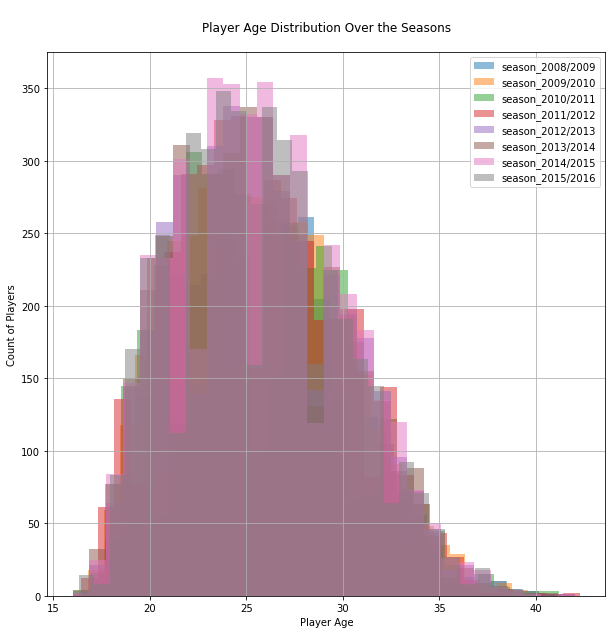

In [120]:
for season in age_distribution_per_seaon.index.levels[0]:
    age_distribution_per_seaon.loc[season].player_age.hist(alpha=0.5, figsize=(10,10), label=f'season_{season}', bins=30)
    
plt.title('\nPlayer Age Distribution Over the Seasons\n')
plt.xlabel('Player Age')
plt.ylabel('Count of Players')
plt.legend();

In [121]:
players_per_season.merge(goals_df, left_on='player_api_id', right_on='player_api_id_goal').groupby(['date','league_id','player_api_id']).sum()

id  player_fifa_api_id   height  \
date       league_id player_api_id                                        
2008-08-09 4769      5217            23984              468384   701.04   
                     11324           15936              101816   360.68   
                     11329           17778              284626   350.52   
                     20401          104104             1957802  2489.20   
                     20482            6756              156959   175.26   
...                                    ...                 ...      ...   
2016-05-25 24558     462608          22932              917040   721.36   
                     493418            626              441336   381.00   
                     614454           1812              683196   533.40   
                     634310          21318              457186   365.76   
                     726956           1619              233139   185.42   

                                    weight  player_age  match_api_id  \
date       league_id player_api_id                                     
2008-08-09 4769      5217            600.0         128       3700390   
                     11324           318.0          56       2730062   
                     11329           300.0          50       2039982   
                     20401          2282.0         350      15870509   
                     20482           179.0          28       1019940   
...                                    ...         ...           ...   
2016-05-25 24558     462608          672.0          88       7968703   
                     493418          352.0          44       3984367   
                     614454          489.0          57       5976615   
                     634310          326.0          40       3984370   
                     726956          176.0          19       1992161   

                                    player_api_id_goal  team_api_id_goal  goal  
date       league_id player_api_id                                              
2008-08-09 4769      5217                        20868             39412     4  
                     11324                       22648             15638     2  
                     11329                       22658             16962     2  
                     20401                      285614            136733    14  
                     20482                       20482              9847     1  
...                                                ...               ...   ...  
2016-05-25 24558     462608                    1850432             40972     4  
                     493418                     986836             19648     2  
                     614454                    1843362             23688     3  
                     634310                    1268620             20358     2  
                     726956                     726956              9931     1  

[281854 rows x 9 columns]

In [122]:
players_per_season.merge(goals_df, left_on='player_api_id', right_on='player_api_id_goal')#.groupby(['player_api_id']).mean()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,league_id,season,date,player_age,match_api_id,player_api_id_goal,team_api_id_goal,goal
0,2,155782,Aaron Cresswell,189615,1989-12-15,170.18,146.0,1729,2015/2016,2016-03-02,26,1724111,155782,8654,1
1,2,155782,Aaron Cresswell,189615,1989-12-15,170.18,146.0,1729,2015/2016,2016-03-02,26,1724301,155782,8654,1
2,2,155782,Aaron Cresswell,189615,1989-12-15,170.18,146.0,1729,2015/2016,2016-03-02,26,1988880,155782,8654,1
3,2,155782,Aaron Cresswell,189615,1989-12-15,170.18,146.0,1729,2015/2016,2016-03-02,26,1989044,155782,8654,1
4,2,155782,Aaron Cresswell,189615,1989-12-15,170.18,146.0,1729,2014/2015,2014-08-16,24,1724111,155782,8654,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3403694,11075,39902,Zvjezdan Misimovic,102359,1982-06-05,180.34,176.0,7809,2008/2009,2008-10-05,26,674531,39902,8721,1
3403695,11075,39902,Zvjezdan Misimovic,102359,1982-06-05,180.34,176.0,7809,2008/2009,2008-10-05,26,674283,39902,8721,1
3403696,11075,39902,Zvjezdan Misimovic,102359,1982-06-05,180.34,176.0,7809,2008/2009,2008-10-05,26,674574,39902,8721,1
3403697,11075,39902,Zvjezdan Misimovic,102359,1982-06-05,180.34,176.0,7809,2008/2009,2008-10-05,26,674302,39902,8721,1


### What teams improved the most over time?

I will look at improvement as the number victories a team has acquired over time.

In [123]:
team_improvement_df = matches[['country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal']].copy()

In [124]:
team_improvement_df.head()

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1
1,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0
2,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3
3,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0
4,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3


In [125]:
def win_lose(arr1,arr2):
    """Determines team1's victory"""
    team1_goal = arr1
    team2_goal = arr2

    if team1_goal-team2_goal>0:
        return 1
    
    else:
        return 0
    

In [126]:
team_improvement_df['home_team_win'] = team_improvement_df[['home_team_goal','away_team_goal']].apply(lambda arr : win_lose(arr.home_team_goal,arr.away_team_goal), axis=1)
team_improvement_df['away_team_win'] = team_improvement_df[['home_team_goal','away_team_goal']].apply(lambda arr : win_lose(arr.away_team_goal,arr.home_team_goal), axis=1)

In [127]:
team_improvement_df.head()

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_team_win,away_team_win
0,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,0,0
1,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,0,0
2,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,0,1
3,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,1,0
4,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,0,1


The above cells create two new columns that have the wins or loses of a team. I will then add all the wins a team has had per season and then compare to latest season I have in the database, the teams with the biggest change will the most improved teams. I will look at 5 teams

In [128]:
constant_columns = ['season','date','match_api_id']
columns_to_stack = [['home_team_api_id','home_team_win'],['away_team_api_id','away_team_win']]

def get_team_victories(df):
    home_df = df[constant_columns].copy()
    home_df[['team_api_id','team_win']] = df[columns_to_stack[0]]
            
    away_df = df[constant_columns].copy()
    away_df[['team_api_id','team_win']] = df[columns_to_stack[1]]
            
    return pd.concat([home_df,away_df])

In [129]:
team_wins = get_team_victories(team_improvement_df)

In [144]:
team_wins.head()

,season,date,match_api_id,team_api_id,team_win
0,2008/2009,2008-08-17,492473,9987,0
1,2008/2009,2008-08-16,492474,10000,0
2,2008/2009,2008-08-16,492475,9984,0
3,2008/2009,2008-08-17,492476,9991,1
4,2008/2009,2008-08-16,492477,7947,0


 The above cells have created a new data frame which has a column that shows either a team won or did not win.
 </br>
 - `0`: this means that a team did not win so it could either be a lose or a draw
 - `1`: this means that a team won the match

In [130]:
team_wins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51958 entries, 0 to 25978
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   season        51958 non-null  object        
 1   date          51958 non-null  datetime64[ns]
 2   match_api_id  51958 non-null  int64         
 3   team_api_id   51958 non-null  int64         
 4   team_win      51958 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 2.4+ MB


In [131]:
team_wins.groupby(['season','team_api_id']).sum()

match_api_id  team_win
season    team_api_id                        
2008/2009 1601             15199282         9
          1957             15199329         9
          2182             15199348        16
          2183             15199331        15
          2186             15199368         7
...                             ...       ...
2015/2016 158085           68542615        13
          177361           59842056         8
          188163           68542719         8
          208931           78297093         9
          274581           59398552         7

[1481 rows x 2 columns]

In [132]:
season_08_09 = team_wins.groupby(['season','team_api_id']).sum().loc['2008/2009'].drop('match_api_id', axis=1)
season_15_16 = team_wins.groupby(['season','team_api_id']).sum().loc['2015/2016'].drop('match_api_id', axis=1)

The above cell looks at first season available in the dataset and also the latest season available in the dataset.
- `season_08_09` is dataframe that represents the 2008/2009 season
- `season_15_16` is dataframe that represents the 2015/2016 season

I will then use the two dataframes to get the number of victory difference between 2008/2009 season and 2015/2016 season

In [145]:
victory_diff = season_08_09.merge(season_15_16,left_index=True, right_index=True)


In [146]:
victory_diff.head()

,team_win_x,team_win_y
team_api_id,,
1601,9,11
1957,9,10
2182,16,13
2186,7,12
6403,9,13


In [147]:
sum(victory_diff.duplicated())

16

In [148]:
victory_diff.drop_duplicates(inplace=True)

In [149]:
sum(victory_diff.duplicated())

0

In [150]:
victory_diff['victory_difference'] = victory_diff['team_win_y']-victory_diff['team_win_x'] 

The above cell computes the difference between 2008/2009 victories with 2015/2016.

I will then pick the five teams to have improved the most by looking at those with the highest difference

In [166]:
five_improved_teams = victory_diff.sort_values('victory_difference', ascending=False)[:5]

In [167]:
five_improved_teams.head()

,team_win_x,team_win_y,victory_difference
team_api_id,,,
9875,12,25,13
9772,17,29,12
9847,19,30,11
9788,8,17,9
9789,15,24,9


In [168]:
five_improved_teams_with_names = five_improved_teams.merge(
    teams[['team_api_id','team_short_name']],
    on='team_api_id')\
    [['team_win_x','team_win_y','victory_difference','team_short_name']]

The above cell merges the five most improved teams dataframe with the teams dataframe, so that I can extract the team names.

I use the new dataframe below to make a plot that shows the improvement

In [169]:
five_improved_teams_with_names.rename(index=lambda x:five_improved_teams_with_names['team_short_name'].values[x], inplace=True)

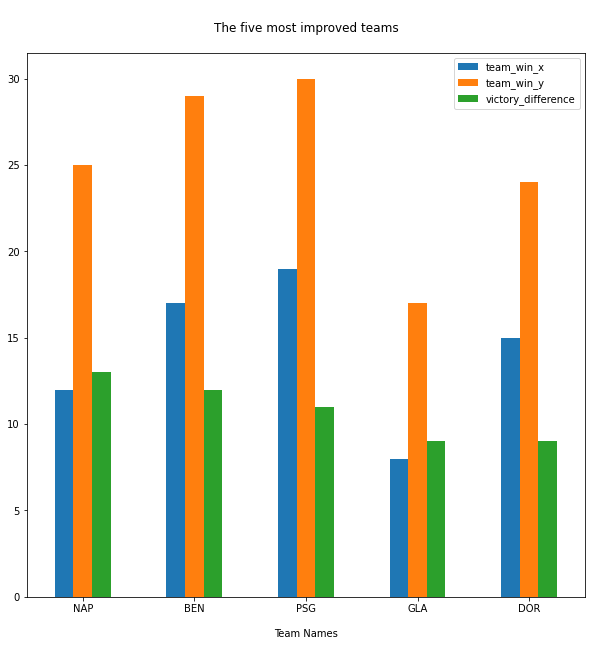

In [173]:
five_improved_teams_with_names.plot.bar(rot=0, figsize=(10,10))
plt.title('\nThe five most improved teams\n')
plt.xlabel('\nTeam Names\n');